In [79]:
# Importing essential libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customer_segmentation/Mall_Customers.csv")

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
# Returns number of rows and columns of the dataset
df.shape

(200, 5)

In [83]:
# Returns an object with all of the column headers
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [84]:
#Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [85]:
# Returns the first x number of rows when head(x). Without a number it returns 5
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [86]:
# Returns the last x number of rows when tail(x). Without a number it returns 5
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [87]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [88]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [89]:
# Returns true for a column having null values, else false
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [90]:
# Creating the copy of dataset
df_copy = df.copy(deep=True)

In [91]:
df_copy.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [92]:
# Dropping the column of 'CustomerID' as it does not provide any value
df_copy.drop('CustomerID', axis=1, inplace=True)
df_copy.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

Text(0, 0.5, 'Count')

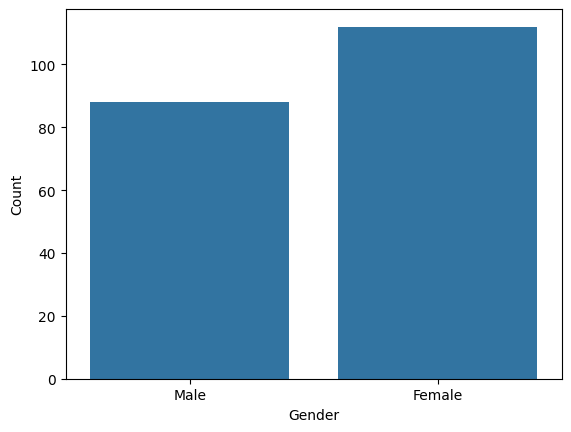

In [93]:
# Visualising the columns 'Gender' using Countplot
sns.countplot(x='Gender', data=df_copy)
plt.xlabel('Gender')
plt.ylabel('Count')

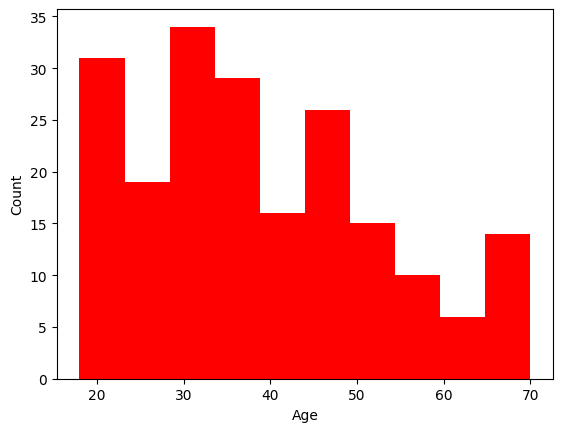

In [94]:
# Visualising the columns 'Age' using Histogram
plt.hist(x=df_copy['Age'], bins=10, orientation='vertical', color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

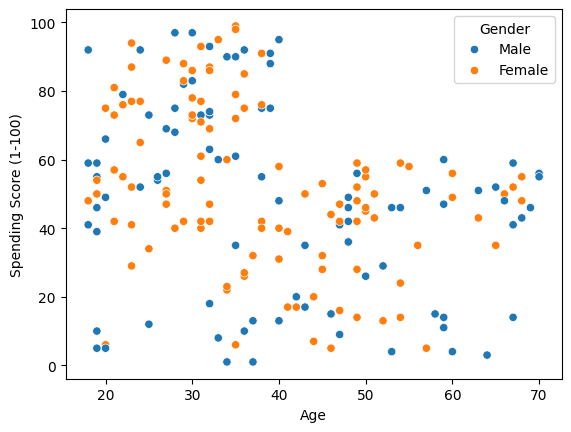

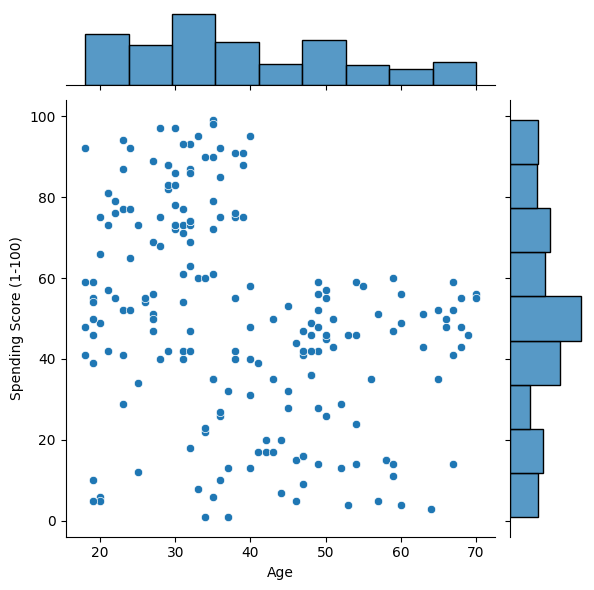

In [95]:
# Visualising the columns 'Age', 'Spending Score (1-100)' using Scatterplot and Jointplot
sns.scatterplot(data=df_copy, x='Age', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=df_copy, x='Age', y='Spending Score (1-100)')

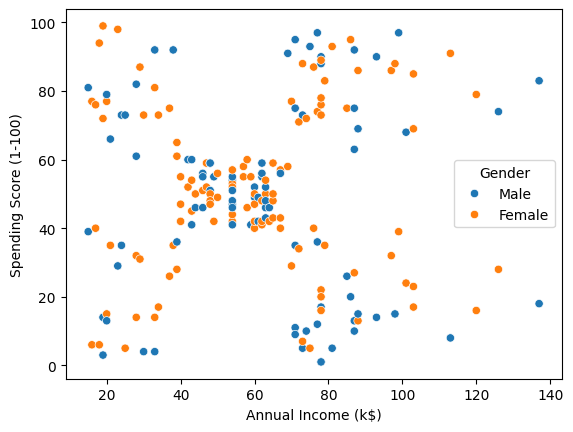

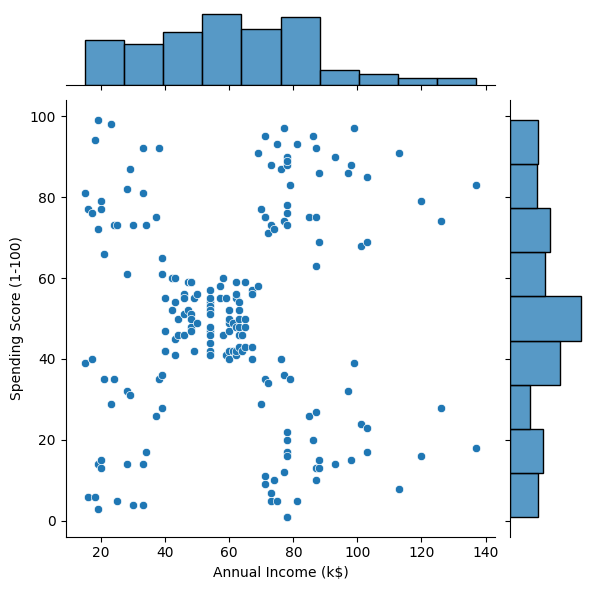

In [96]:
# Visualising the columns 'Annual Income (k$)', 'Spending Score (1-100)' using Scatterplot and Jointplot
sns.scatterplot(data=df_copy, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=df_copy, x='Annual Income (k$)', y='Spending Score (1-100)')

In [97]:
# Selecting 'Annual Income' and 'Spending Score' as the features for clustering
X = df_copy.iloc[:, [2,3]]

In [98]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [99]:
# Calculating WCSS values for 1 to 10 clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_model.fit(X)
  wcss.append(kmeans_model.inertia_)

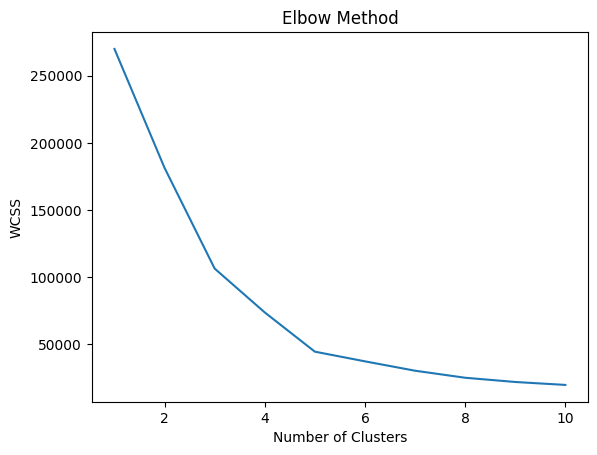

In [100]:
# Plotting the WCSS values
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [102]:
# Training the KMeans model with n_clusters=5
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X)

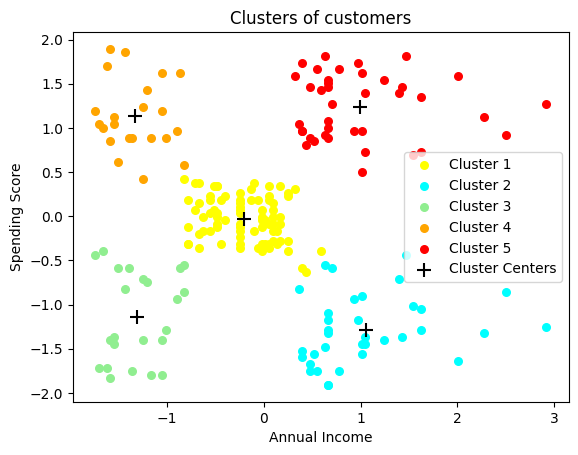

In [103]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'red', label = 'Cluster 5')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()